In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# 1. Загрузка и обработка данных

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
print('Количество дубликатов в датасете:', df[df.duplicated()].shape[0])

Количество дубликатов в датасете: 0


In [6]:
df.drop(columns=['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True) # Удаляем неинформативные признаки
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [7]:
# Проверим данные на наличие скрытых пропусков
for i in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']:
    print(f'Уникальные значение в столбце {i}: {df[i].unique()}')
    print()


Уникальные значение в столбце experience_level: ['MI' 'SE' 'EN' 'EX']

Уникальные значение в столбце employment_type: ['FT' 'CT' 'PT' 'FL']

Уникальные значение в столбце job_title: ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Dat

In [8]:
display(df['employee_residence'].value_counts().head(10))
print()
display(df['job_title'].value_counts().head(10))
print()
display(df['company_location'].value_counts().head(10))

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: count, dtype: int64

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64

В столбце employee_residence наблюдается более 30 различных стран. Так как данный признак можно использовать в своём анализе, то объединим все страны, у которых количество наблюдений 5 и менее в 1 блок - other.

Аналогичная ситуация со столбцом job_title, оставим только первые 4 группы, все остальное объединим в 1 блок - other

Также поступим и со столбцом company_location, оставим только первые 8 групп, все остальные объединим в 1 блок - other

In [9]:
df['employee_residence'] = df['employee_residence'].apply(lambda i: i if i in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'PT', 'BR', 'PK'] else 'other')
df['job_title'] = df['job_title'].apply(lambda i: i if i in ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer '] else 'other')
df['company_location'] = df['company_location'].apply(lambda i: i if i in ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR'] else 'other')


In [10]:
display(df['employee_residence'].value_counts())
print()
display(df['job_title'].value_counts())
print()
display(df['company_location'].value_counts())

employee_residence
US       332
other     76
GB        44
IN        30
CA        29
DE        25
FR        18
ES        15
GR        13
JP         7
PK         6
PT         6
BR         6
Name: count, dtype: int64

job_title
other             235
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

company_location
US       355
other     83
GB        47
CA        30
DE        28
IN        24
FR        15
ES        14
GR        11
Name: count, dtype: int64

Категориальные признаки - все, кроме salary_in_usd

In [11]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,4,NaN,13,NaN,9,3
top,NaN,SE,FT,other,NaN,US,NaN,US,M
freq,NaN,280,588,235,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.00000,NaN,NaN


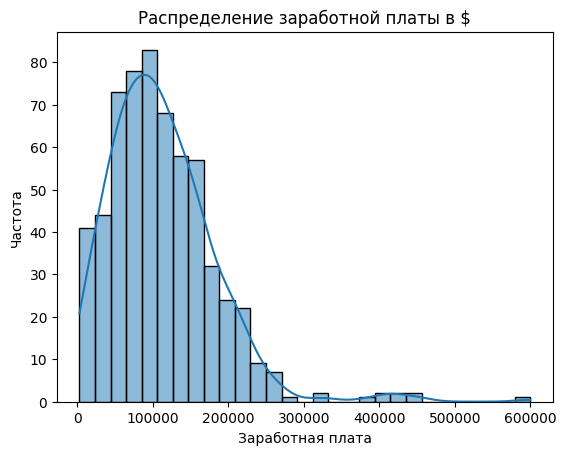

In [12]:
plt.title('Распределение заработной платы в $')
plt.xlabel('Заработная плата')
plt.ylabel('Частота')
sns.histplot(df['salary_in_usd'], kde=True);


In [13]:
# Адаптируем содержание таблицы 
df['experience_level'] = df['experience_level'].replace({
    'EN': 'Entry-level',
    'MI': 'Mid-level', 
    'SE': 'Senior-level',
    'EX': 'Executive'
})

df['employment_type'] = df['employment_type'].replace({
    'PT': 'Part-time',
    'FT': 'Full-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

df['remote_ratio'] = df['remote_ratio'].replace({
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
})

# Расшифровываем страны
country_codes = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'DE': 'Germany',
    'FR': 'France',
    'IN': 'India',
    'CA': 'Canada',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'PT': 'Portugal',
    'BR': 'Brazil',
    'PK': 'Pakistan',
    'other': 'Other Countries'
}

df['employee_residence'] = df['employee_residence'].replace(country_codes)
df['company_location'] = df['company_location'].replace(country_codes)

**Первый анализ данных позволяет сделать ряд выводов:**
1) Пропусков в данных нет
2) Дубликатов в данных нет
3) Такие столбцы как Unnamed: 0, salary(общая выплаченная валовая сумма заработной платы) и salary_currency(валюта заработной платы) являются неиформативными, так как вся необходимая информация про зарплату представлена в столбце salary_in_usd (заработная плата в долларах США)
4) Некоторые из столбцов хоть и не помогут ответить на основные вопросы проекта, однако могут пригодится для поиска дополнительных закономерностей, оставляем их.
5) В столбце employee_residence, job_title, company_location уменьшили количество групп
6) Адаптировали содержание таблицы
7) Столбец salary_in_usd не выглядит как нормальное распределение, статистически подтвердим это далее
8) Я не стал изменять типы данных, так как в данном датасете очень малое количество наблюдений. Однако при желании можно заменить тип данных всех категориальных столбцоы на category. Также можно поменять тип int64 на int32 у столбца salary_in_usd.

# 2. Визуальный анализ

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    object
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


**Базовый визуальный анализ каждого признака**

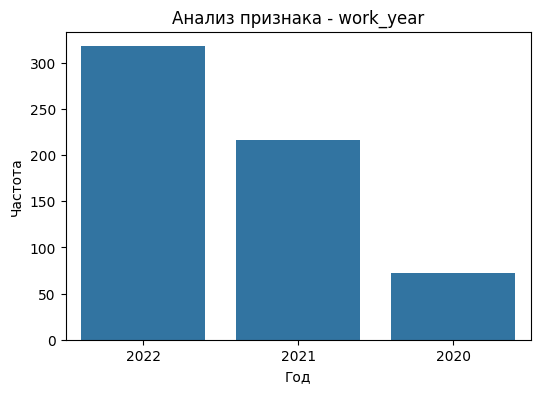

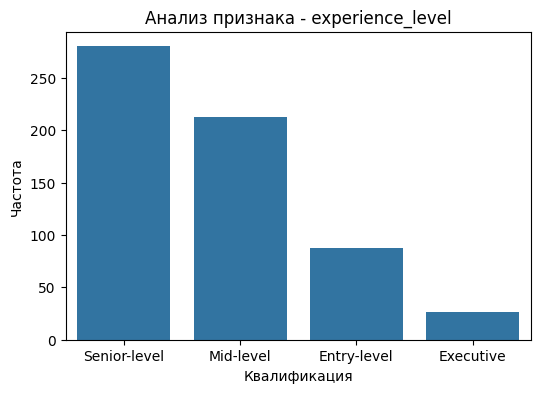

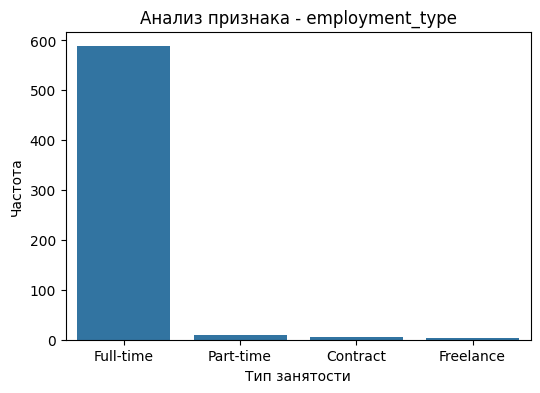

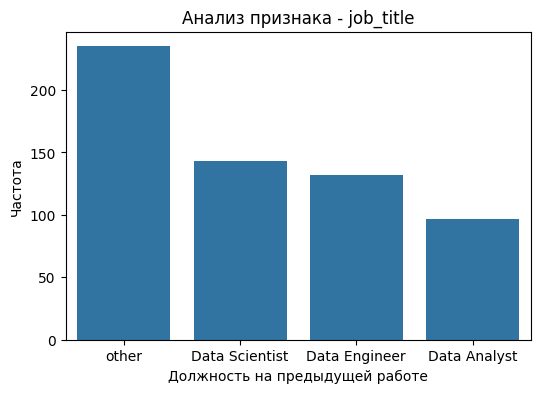

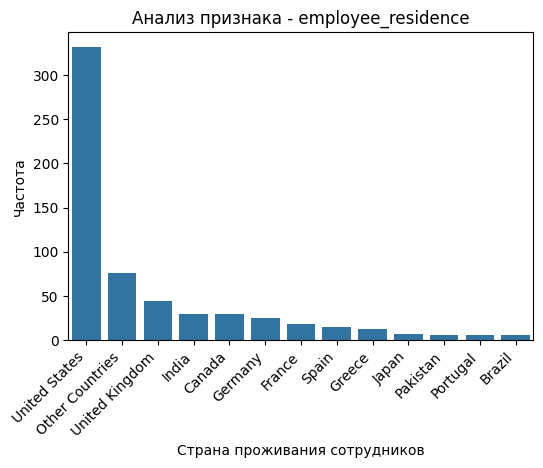

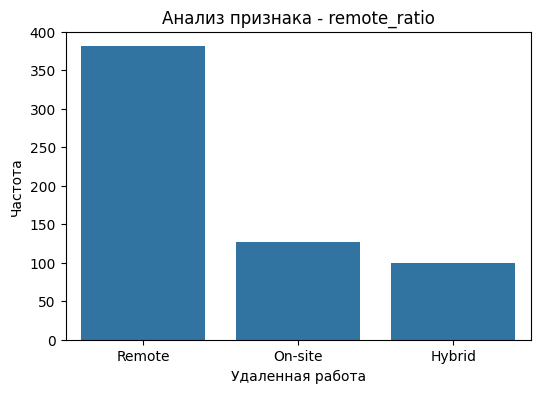

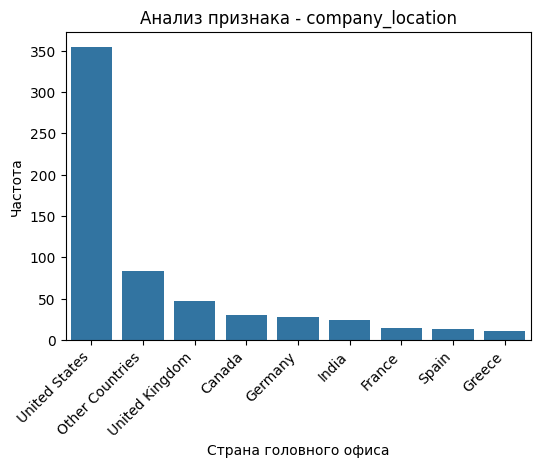

In [15]:
list_name_of_columns = ['work_year','experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio','company_location', 'company_size']
list_name_of_x_labels = ['Год', 'Квалификация', 'Тип занятости', 'Должность на предыдущей работе', 'Страна проживания сотрудников', 'Удаленная работа', 'Страна головного офиса', 'Размер компании']
for i in range(0, 7):
    if list_name_of_columns[i] in ['employee_residence', 'company_location']:
        plt.figure(figsize=(6, 4))
        plt.title(f'Анализ признака - {list_name_of_columns[i]}')
        plt.xlabel(f'{list_name_of_x_labels[i]}')
        plt.ylabel('Частота')
        plt.xticks(rotation=45, ha='right')
        sns.countplot(df, x=list_name_of_columns[i], order=df[list_name_of_columns[i]].value_counts().index);
    else:
        plt.figure(figsize=(6, 4))
        plt.title(f'Анализ признака - {list_name_of_columns[i]}')
        plt.xlabel(f'{list_name_of_x_labels[i]}')
        plt.ylabel('Частота')
        sns.countplot(df, x=list_name_of_columns[i], order=df[list_name_of_columns[i]].value_counts().index);
    

<Axes: xlabel='Заработная плата'>

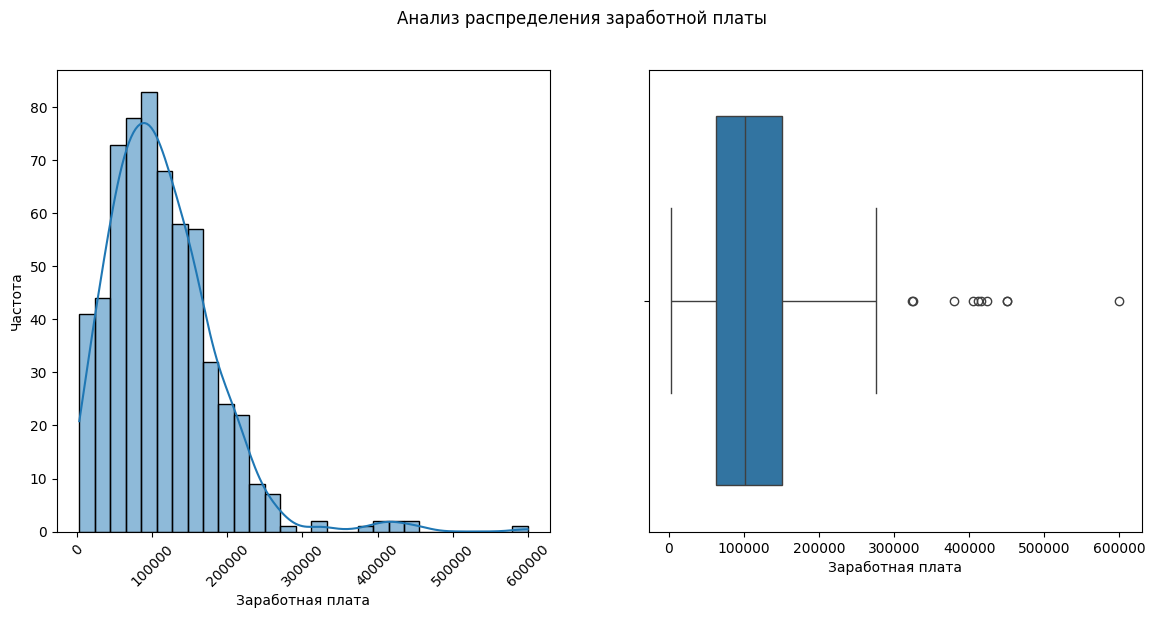

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Анализ распределения заработной платы')
axes[0].set_ylabel('Частота')
axes[0].set_xlabel('Заработная плата')
axes[0].tick_params(axis='x', rotation=45)
sns.histplot(df['salary_in_usd'], kde=True, ax=axes[0])

axes[1].set_xlabel('Заработная плата')
sns.boxplot(df['salary_in_usd'], ax=axes[1], orient='h')

**Отличаются ли медианные заработные платы в зависимости от года?**

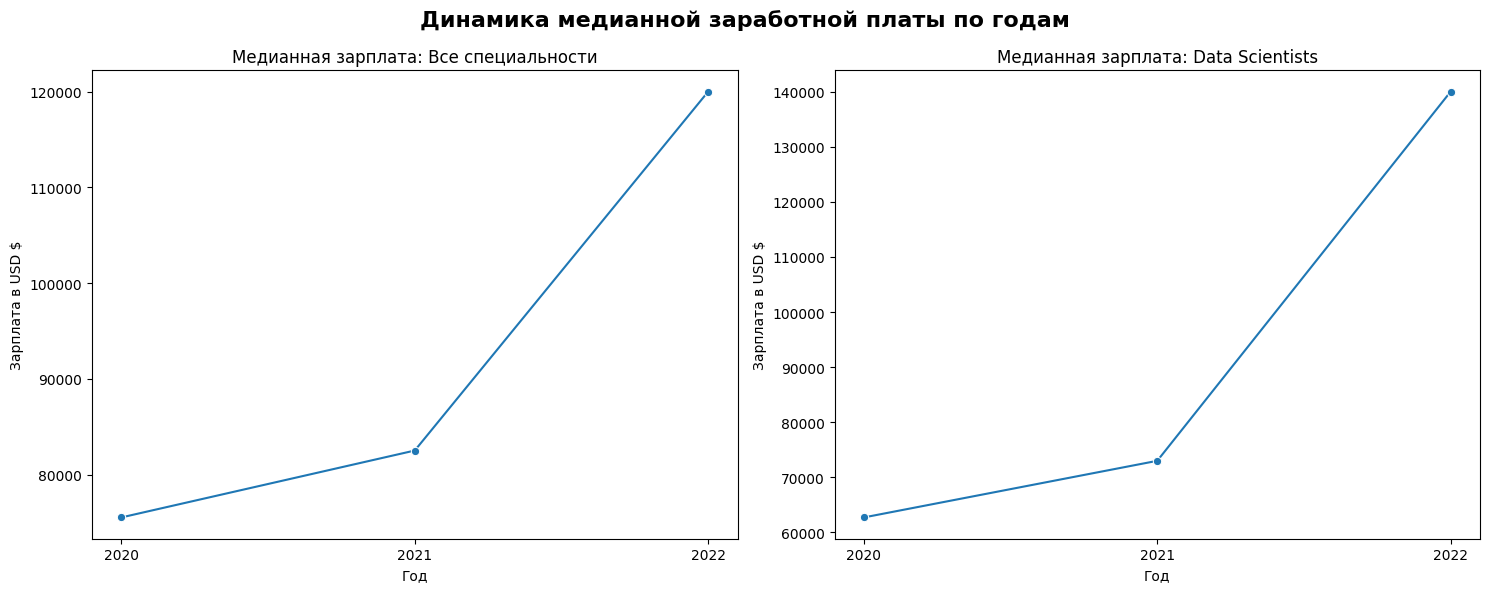

In [17]:
# Готовим данные для графиков
years_data = df.groupby('work_year', observed=False)['salary_in_usd'].median()
filt_data_science = df[df['job_title'] == 'Data Scientist']
years_data_science = filt_data_science.groupby('work_year', observed=False)['salary_in_usd'].median()

# Первый график
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(y=years_data.values, x=years_data.index, ax=axes[0], marker='o')
axes[0].set_xticks([2020, 2021, 2022])
axes[0].set_title('Медианная зарплата: Все специальности')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Зарплата в USD $')


# Второй график
sns.lineplot(y=years_data_science.values, x=years_data_science.index, ax=axes[1], marker='o')
axes[1].set_xticks([2020, 2021, 2022])
axes[1].set_title('Медианная зарплата: Data Scientists')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Зарплата в USD $')


fig.suptitle('Динамика медианной заработной платы по годам', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



**Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**

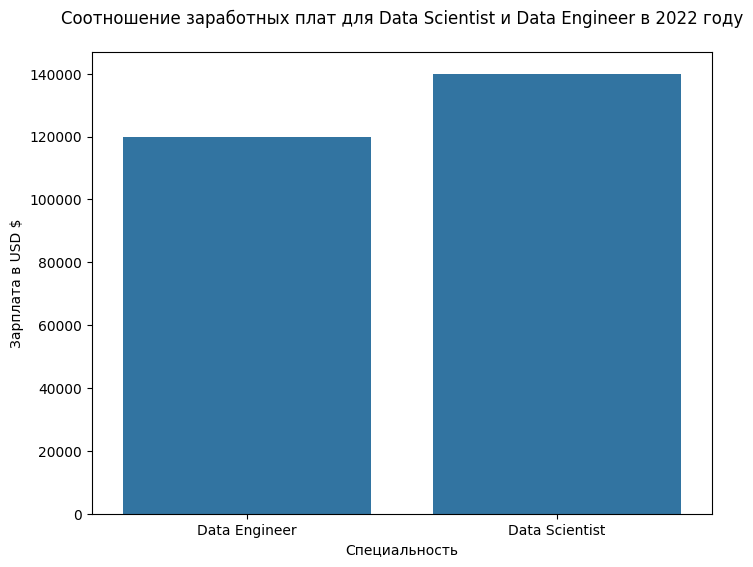

In [18]:
data_science_engineer = df[
    (df['job_title'].isin(['Data Scientist', 'Data Engineer'])) & 
    (df['work_year'] == 2022)
]

data_science_engineer_group = data_science_engineer.groupby('job_title', observed=True)['salary_in_usd'].median()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_science_engineer_group.index, y=data_science_engineer_group.values)
plt.title('Соотношение заработных плат для Data Scientist и Data Engineer в 2022 году', pad=20)
plt.xlabel('Специальность')
plt.ylabel('Зарплата в USD $');

**Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**

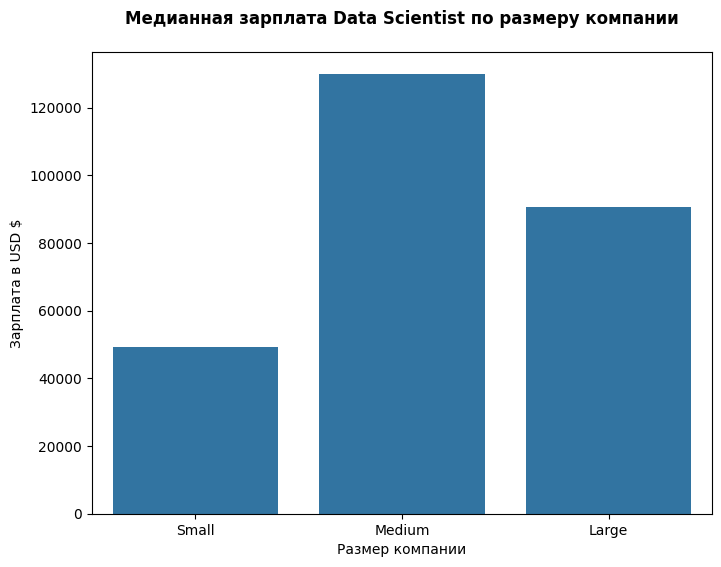

In [19]:
order_list = ['Small', 'Medium', 'Large']
data_science_company = df[df['job_title'] == 'Data Scientist']
data_science_company_group = data_science_company.groupby('company_size')['salary_in_usd'].median()

plt.figure(figsize=(8, 6))
sns.barplot(x=data_science_company_group.index, 
            y=data_science_company_group.values, 
            order=order_list
)

plt.title('Медианная зарплата Data Scientist по размеру компании', fontweight='bold', pad=20)
plt.xlabel('Размер компании')
plt.ylabel('Зарплата в USD $');

**Есть ли влияние квалификации и типа трудоустройства на заработную плату?**

In [20]:
data_experience_level_employment_level = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].median().reset_index()
data_experience_level_employment_level

,experience_level,employment_type,salary_in_usd
0,Entry-level,Contract,65937.5
1,Entry-level,Full-time,59102.0
2,Entry-level,Part-time,15966.0
3,Executive,Contract,416000.0
4,Executive,Full-time,167875.0
5,Mid-level,Contract,270000.0
6,Mid-level,Freelance,20000.0
7,Mid-level,Full-time,77161.0
8,Mid-level,Part-time,54957.0
9,Senior-level,Contract,105000.0


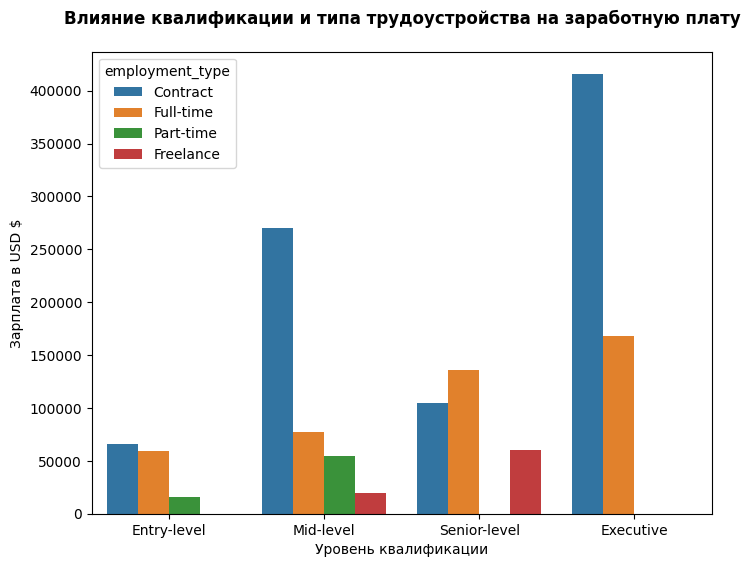

In [21]:
order_list = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive']
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
            data=data_experience_level_employment_level, 
            x='experience_level', 
            y='salary_in_usd', 
            hue='employment_type',
            order=order_list)
barplot.set_title('Влияние квалификации и типа трудоустройства на заработную плату', pad=20, fontweight='bold')
barplot.set_ylabel('Зарплата в USD $')
barplot.set_xlabel('Уровень квалификации');

Проверим данные для аномального столбца Mid-level/Contract и Executive/Contract

In [22]:
data_mid_level_contract = df[(df['experience_level'] == 'Mid-level') & (df['employment_type'] == 'Contract')]
data_mid_level_contract


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
78,2021,Mid-level,Contract,other,270000,United States,Remote,United States,Large


In [23]:
data_executive_level_contract = df[(df['experience_level'] == 'Executive') & (df['employment_type'] == 'Contract')]
data_executive_level_contract

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
225,2021,Executive,Contract,other,416000,United States,Remote,United States,Small


**Верно ли, что в одних странах заработная плата выше, чем в других?**

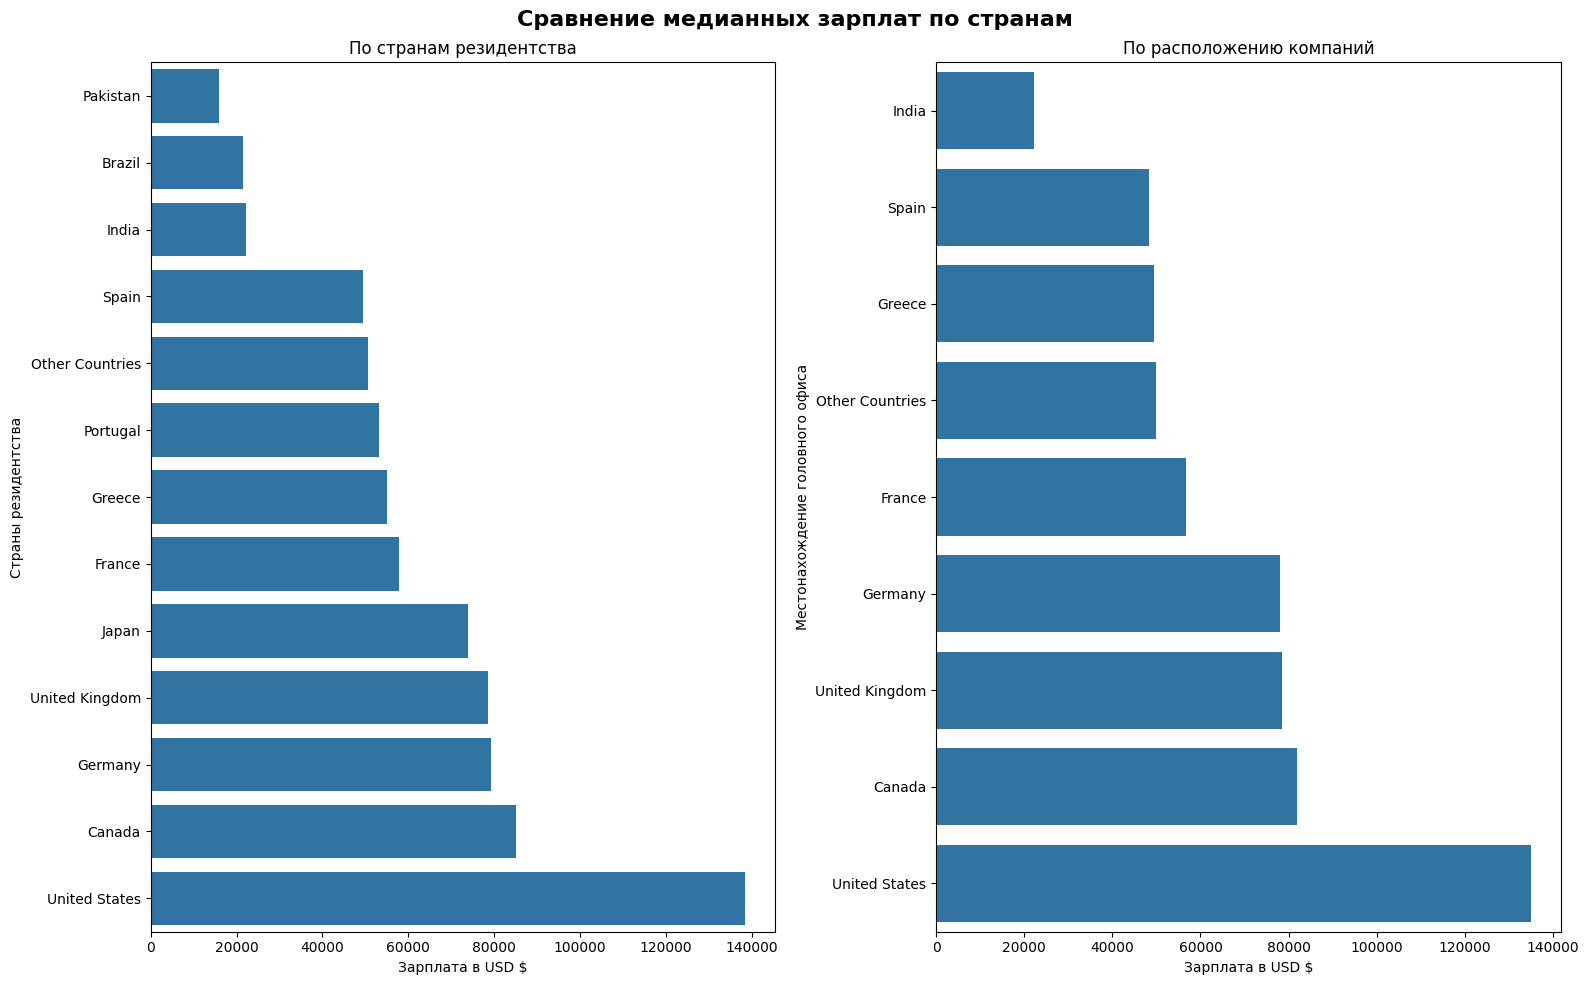

In [24]:
country_employee_data = df.groupby('employee_residence')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
country_company_location_data = df.groupby('company_location')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

barplot_1 = sns.barplot(
    data=country_employee_data, 
    y='employee_residence', 
    x='salary_in_usd',      
    ax=axes[0])

barplot_1.set_xlabel('Зарплата в USD $')
barplot_1.set_ylabel('Страны резидентства')
barplot_1.set_title('По странам резидентства')

barplot_2 = sns.barplot(
    data=country_company_location_data, 
    y='company_location',  
    x='salary_in_usd', 
    ax=axes[1])

barplot_2.set_xlabel('Зарплата в USD $')
barplot_2.set_ylabel('Местонахождение головного офиса')
barplot_2.set_title('По расположению компаний')

fig.suptitle('Сравнение медианных зарплат по странам', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
remote_ratio_data = df.groupby('remote_ratio')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
remote_ratio_data

,remote_ratio,salary_in_usd
0,Hybrid,69999.0
1,On-site,99000.0
2,Remote,115000.0


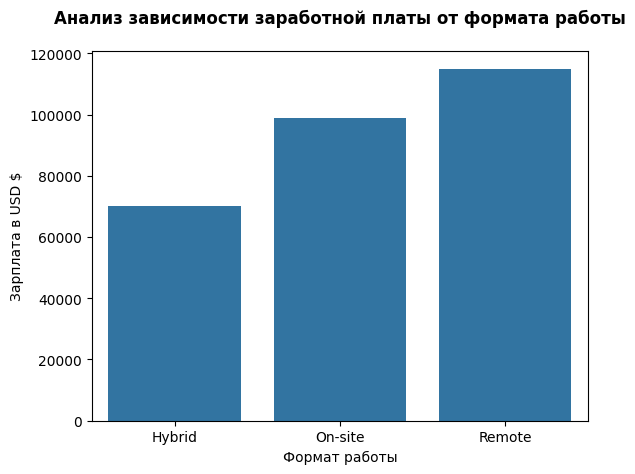

In [26]:
plt.title('Анализ зависимости заработной платы от формата работы', pad=20,  fontsize=12, fontweight='bold')
sns.barplot(
        data=remote_ratio_data,
        x='remote_ratio',
        y='salary_in_usd')
plt.xlabel('Формат работы')
plt.ylabel('Зарплата в USD $');

**Выводы:**
1) Динамика заработной платы положительна как для специалистов Data Scientist, так и для всех специальностей в целом.

2) Медианная заработная плата специалистов Data Scientist на 20 тысяч долларов ниже, чем у Data Engineer.

3) Наибольший уровень заработной платы наблюдается в средних компаниях, а не в крупных. Данную закономерность можно объяснить тем, что в средних компаниях специалисты часто выполняют полный цикл работы с данными: от сбора и обработки информации до построения и внедрения моделей машинного обучения. В крупных компаниях обычно существует чёткое разделение обязанностей между Data Engineer, Data Analyst и Data Scientist, что может ограничивать влияние каждого отдельного специалиста на бизнес-результаты и, соответственно, уровень их вознаграждения.

4) На столбчатой диаграмме, отражающей влияние уровня квалификации и типа трудоустройства на заработную плату, была выявлена интересная аномалия. Столбец Mid-level/Contract значительно превышает показатели даже Senior-специалистов, демонстрируя аномально высокое значение. Аналогичная ситуация наблюдается для категории Executive/Contract, которая также существенно выше других значений.

    Детальный анализ показал, что обе эти категории формируются единственным наблюдением в каждой группе, что не отражает реальной рыночной ситуации и является статистически незначимым. Такие выбросы могут быть связаны с уникальными обстоятельствами конкретного специалиста (особые условия контракта, нишевая экспертиза или ошибка в данных). Данные наблюдения можно либо удалить, либо игнорировать, если они не будут мешать в дальнейшем анализе.

5) Сравнение медианных зарплат в зависимости от местонахождения программиста или головного офиса не дало никаких интересных результатов для осмысления. Наибольшие доходы наблюдаются в сильнейших экономиках мира с наиболее развитой it-сферой.

6) Анализ доходов в размере формата работы также не дает интересных результатов. Очевидно, что работа в офисе будет оплачиваться намного лучше, чем из дома или гибридный подход.


# 3. Статистический анализ данных

**В этом блоке нам необходимо проверить ряд следующих гипотез:**
1) Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
2) Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
3) Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
4) Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

    Самостоятельные исследования:

5) Как соотносятся зарплаты специалистов Entry-level, Mid-level, Senior-level, Executive уровней?
6) Влияет ли местоположение головного офиса на заработную плату специалистов Data Analyst?
7) Есть ли связь между опытом работы и размером компании?

## 🔍1. Проверка статистической гипотезы: Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

In [27]:
# Импорт необходимых библиотек
import statsmodels.api as sm
import scipy.stats as stats

In [28]:
data_science = df[df['job_title'] == 'Data Scientist'] # Группируем данные
data_science_2020 = np.array(data_science[data_science['work_year'] == 2020]['salary_in_usd'])
data_science_2021 = np.array(data_science[data_science['work_year'] == 2021]['salary_in_usd'])
data_science_2022 = np.array(data_science[data_science['work_year'] == 2022]['salary_in_usd'])

### Проверка нормальности распределения: Тест Шапиро-Уилка

### 📊 Формулировка гипотез:

### Нулевая гипотеза (H₀): **Выборка распределена нормально**

### Альтернативная гипотеза (H₁):  **Выборка не распределена нормально**

### 🔍 Интерпретация результатов
Тест проверяет соответствие эмпирического распределения теоретическому нормальному распределению

In [29]:
alpha = 0.05
years_dict = {
    '2020 год' : data_science_2020,
    '2021 год' : data_science_2021,
    '2022 год' : data_science_2022}

for year, data in years_dict.items():
    _, p = stats.shapiro(data)

    if p <= alpha:
        print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка за {year} не имеет нормального распределения')
    else:
        print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка за {year} имеет нормальное распределения')

P-value = 0.000. Отклоняем нулевую гипотезу. Выборка за 2020 год не имеет нормального распределения
P-value = 0.125. Принимаем нулевую гипотезу. Выборка за 2021 год имеет нормальное распределения
P-value = 0.327. Принимаем нулевую гипотезу. Выборка за 2022 год имеет нормальное распределения


### Нулевая гипотеза (H₀)
**Отсутствие статистически значимых различий в медианных зарплатах между годами**  
$H_0: \mu_0 = \mu_1 = \mu_2$

### Альтернативная гипотеза (H₁)
**Наличие статистически значимых различий в медианных зарплатах между годами**  
$H_1: \mu_0 \neq \mu_1 \neq \mu_2$

где:
- $\mu_0$ — медианная заработная плата в 2020 году
- $\mu_1$ — медианная заработная плата в 2021 году  
- $\mu_2$ — медианная заработная плата в 2022 году

### 🎯 Цель исследования
Проверить, существуют ли статистически значимые различия в медианных зарплатах специалистов Data Scientist между 2020, 2021 и 2022 годами.

### Статистический тест Краскела-Уолиса


In [30]:
_, p = stats.kruskal(data_science_2020, data_science_2021, data_science_2022)

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


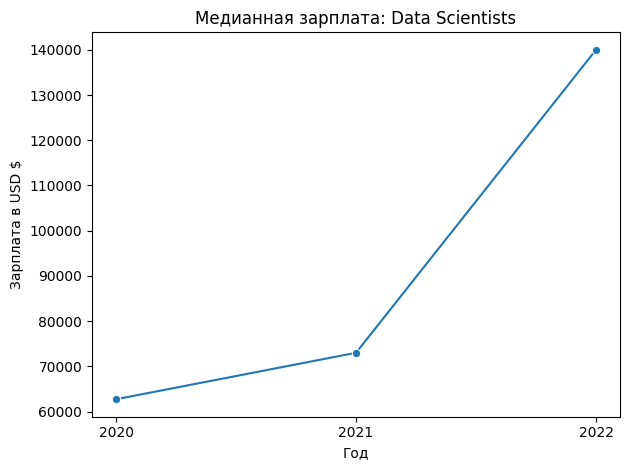

In [31]:
# Готовим данные для графиков
filt_data_science = df[df['job_title'] == 'Data Scientist']
years_data_science = filt_data_science.groupby('work_year')['salary_in_usd'].median()


lineplot = sns.lineplot(y=years_data_science.values, x=years_data_science.index, marker='o')
lineplot.set_xticks([2020, 2021, 2022])
lineplot.set_title('Медианная зарплата: Data Scientists')
lineplot.set_xlabel('Год')
lineplot.set_ylabel('Зарплата в USD $')


fig.suptitle('Динамика медианной заработной платы по годам', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Проведя статистический тест Краскела-Уолиса и посторив график зависимости медианной заработной платы можно утверждать, что ежегодно происходит рост доходов специалистов data science.

## 🔍2. Проверка статистической гипотезы: Существует ли разница между заработной платы Data Scientist и Data Engineer в 2022 году?

In [32]:
# Группируем данные
data_engineer = df[df['job_title'] == 'Data Engineer']
data_engineer_2022 = np.array(data_engineer[data_engineer['work_year'] == 2022]['salary_in_usd'])
print(data_science_2022)
print(data_engineer_2022)

[130000  90000 136620  99360 117789 104702 146000 123000  65438  39263
 165220 120160 180000 120000  95550 167000 123000 150000 211500 138600
 170000 123000 215300 158200 180000  71982  45807 260000 180000  80000
 140400 215300  31615  18442 104890 140000 220000 140000 183228  91614
 185100 200000 120000 230000 100000 100000  35590 100000 165000  52396
  40000  86703  48000 122346  69336 135000  78000 141300 102100 205300
 140400 176000 144000 205300 140400 140000 210000 140000 210000 140000
 210000 140000 230000 150000 210000 160000 130000]
[135000 170000 150000  52351 242000 200000  78526  52351  45807 181940
 132320 220110 160080 165400 132320 243900 128875  93700 156600 108800
 113000  78526  65438 160000 136000 165400 136994 101570 132320 155000
 117789 209100 154600 175000  98158 183600  65949  49461  78526  58894
  63900  82900 100800  49461  87932  76940 104702  91614  65949  87932
  98158  78526  76940 209100 154600 180000  80000 105000  54957 120000
 100000 324000 216000 2100

### Проверка нормальности распределения: Тест Шапиро-Уилка

### 📊 Формулировка гипотез:

### Нулевая гипотеза (H₀): **Выборка распределена нормально**

### Альтернативная гипотеза (H₁):  **Выборка не распределена нормально**

### 🔍 Интерпретация результатов
Тест проверяет соответствие эмпирического распределения теоретическому нормальному распределению

In [33]:
_, p = stats.shapiro(data_science_2022)
if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка имеет нормального распределения')

P-value = 0.327. Принимаем нулевую гипотезу. Выборка имеет нормального распределения


In [34]:
_, p = stats.shapiro(data_engineer_2022)
if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка имеет нормального распределения')

P-value = 0.010. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения


### Нулевая гипотеза (H₀)
**Отсутствие статистически значимых различий в распределении зарплат между Data Scientists и Data Engineers**  
$H_0: F_{\text{DS}}(x) = F_{\text{DE}}(x)$  
*Распределение зарплат Data Scientists и Data Engineers идентично*

### Альтернативная гипотеза (H₁)
**Наличие статистически значимых различий в распределении зарплат между Data Scientists и Data Engineers**  
$H_1: F_{\text{DS}}(x) \neq F_{\text{DE}}(x)$  
*Распределение зарплат Data Scientists и Data Engineers различается*

---

### 🎯 Цель исследования
Проверить, существуют ли статистически значимые различия в распределении зарплат между специалистами Data Scientist и Data Engineer в 2022 году.

---

### Статистический тест Манна-Уитни (U-критерий)

**Применимость теста:**
- Независимые выборки
- Порядковая шкала или непрерывные данные
- Отсутствие нормальности распределения



In [35]:
_, p = stats.mannwhitneyu(data_science_2022, data_engineer_2022)
if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборки имеют статистически значимые отличия')
else:
    print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборки не имеют статистически значимые отличия')

P-value = 0.155. Принимаем нулевую гипотезу. Выборки не имеют статистически значимые отличия


Исходя из результатов теста Манна-Уитни мы можем сделать вывод, что с вероятностью 0.95 заработная плата у специалистов Data science и Data Engineer отличаются.

## 🔍3. Проверка статистической гипотезы: Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

In [36]:
# Подготовка данных
data_science_small = np.array(data_science[data_science['company_size'] == 'Small']['salary_in_usd'])
data_science_medium = np.array(data_science[data_science['company_size'] == 'Medium']['salary_in_usd'])
data_science_large = np.array(data_science[data_science['company_size'] == 'Large']['salary_in_usd'])

In [37]:
print(data_science_small)
print()
print(data_science_medium)
print()
print(data_science_large)

[ 51321  45760  76958  21669  62726  49268 105000  91237  62726  42197
   9466 100000  82500   2859   5679  12901  87738  90000  16904  25532
  48000]

[ 39916  38776 118000 138350  49646  80000 150000 119059  61467  33808
  46809   4000  28399  77684 100000 130000  90000 136620  99360 117789
 104702 146000 123000  65438  39263 165220 120160  95550 167000 123000
 150000 211500 138600 170000 123000 180000  71982  45807 260000 180000
  80000  18442 104890 140000 220000 140000 183228  91614 185100 200000
 120000 230000 100000 100000 100000 165000  86703  69336  78000 141300
 102100 176000 144000 205300 140400 140000 210000 140000 210000 140000
 210000 140000 230000 150000 210000 160000 130000]

[ 79833  35735  40481  68428 105000 120000 412000  53192  29751  73000
  50000  75774  13400  40038  90734 147000  37825 160000  90734 116914
  56256  88654 135000 103691 165000  36643 115000 130000  58000  20171
 109000 180000 120000 215300 158200 140400 215300  31615  35590  52396
  40000 122346 

### Проверка нормальности распределения: Тест Шапиро-Уилка

### 📊 Формулировка гипотез:

### Нулевая гипотеза (H₀): **Выборка распределена нормально**

### Альтернативная гипотеза (H₁):  **Выборка не распределена нормально**

### 🔍 Интерпретация результатов
Тест проверяет соответствие эмпирического распределения теоретическому нормальному распределению

In [38]:
_, p = stats.shapiro(data_science_small)
if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка имеет нормальное распределения')

P-value = 0.189. Принимаем нулевую гипотезу. Выборка имеет нормальное распределения


In [39]:
_, p = stats.shapiro(data_science_medium)
if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка имеет нормальное распределения')

P-value = 0.639. Принимаем нулевую гипотезу. Выборка имеет нормальное распределения


In [40]:
_, p = stats.shapiro(data_science_large)
if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка имеет нормальное распределения')

P-value = 0.000. Отклоняем нулевую гипотезу. Выборка не имеет нормального распределения


### Нулевая гипотеза (H₀)
**Отсутствие статистически значимых различий в медианных зарплатах в разных компаниях**  
$H_0: \mu_0 = \mu_1 = \mu_2$

### Альтернативная гипотеза (H₁)
**Наличие статистически значимых различий в медианных зарплатах в разных компаниях**  
$H_1: \mu_0 \neq \mu_1 \neq \mu_2$

где:
- $\mu_0$ — медианная заработная плата в малой фирме
- $\mu_1$ — медианная заработная плата на среднем предприятии 
- $\mu_2$ — медианная заработная плата в большой компании
### 🎯 Цель исследования
Проверить, существуют ли статистически значимые различия в медианных зарплатах специалистов Data Scientist в малых, средних и крупных предпритиях.

### Статистический тест Краскела-Уолиса

In [41]:
_, p = stats.kruskal(data_science_small, data_science_medium, data_science_large)

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


## 🔍4. Проверка статистической гипотезы: Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

### Нулевая гипотеза (H₀)
**Отсутствие статистически значимой связи между должностью и размером компании**  
$H_0: \text{Должность и размер компании независимы}$

### Альтернативная гипотеза (H₁)  
**Наличие статистически значимой связи между должностью и размером компании**  
$H_1: \text{Должность и размер компании зависимы}$

### 🎯 Цель исследования
Проверить, существует ли статистически значимая связь между распределением должностей Data Scientist и Data Engineer и компаниями разного размера.

---

### Статистический тест хи-квадрат (χ²)

**Суть теста:** Проверка независимости двух категориальных переменных путем сравнения наблюдаемых частот с ожидаемыми частотами при условии независимости.



In [42]:
# Готовим данные
data_filtr_4 = df[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'Data Engineer')]

# вычисляем таблицу сопряжённости
table = pd.crosstab(data_filtr_4['job_title'], data_filtr_4['company_size'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)


if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Должность и размер компании зависимы.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Должность и размер компании независимы.')

P-value = 0.008. Отклоняем нулевую гипотезу. Должность и размер компании зависимы.


Результат статистического теста с вероятностью 0.95 утверждает, что должность и размер компании зависимы, то есть размер компании влияет на количество специалистов в разных предприятиях. Данный факт достаточно логичен, так как чем больше размер компании, тем сильнее изменяется структура рабочих 

## 🔍5. Проверка статистической гипотезы: Как соотносятся зарплаты специалистов Entry-level, Mid-level, Senior-level, Executive уровней?

In [60]:
# Подготовка данных 
data_entry_level = np.array(df[df['experience_level'] == 'Entry-level']['salary_in_usd'])
data_mid_level = np.array(df[df['experience_level'] == 'Mid-level']['salary_in_usd'])
data_senior_level = np.array(df[df['experience_level'] == 'Senior-level']['salary_in_usd'])
data_executive_level = np.array(df[df['experience_level'] == 'Executive']['salary_in_usd'])

### Проверка нормальности распределения: Тест Шапиро-Уилка

### 📊 Формулировка гипотез:

### Нулевая гипотеза (H₀): **Выборка распределена нормально**

### Альтернативная гипотеза (H₁):  **Выборка не распределена нормально**

### 🔍 Интерпретация результатов
Тест проверяет соответствие эмпирического распределения теоретическому нормальному распределению

In [44]:
experience_levels_dict = {
    'Entry-level': data_entry_level,
    'Mid-level': data_mid_level,
    'Senior-level': data_senior_level,
    'Executive': data_executive_level
}
for keys, values in experience_levels_dict.items():
    _, p = stats.shapiro(values)
    if p <= alpha:
        print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка для уровня образования {keys} не имеет нормального распределения')
    else:
        print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка для уровня образования {keys} имеет нормальное распределения')

P-value = 0.000. Отклоняем нулевую гипотезу. Выборка для уровня образования Entry-level не имеет нормального распределения
P-value = 0.000. Отклоняем нулевую гипотезу. Выборка для уровня образования Mid-level не имеет нормального распределения
P-value = 0.000. Отклоняем нулевую гипотезу. Выборка для уровня образования Senior-level не имеет нормального распределения
P-value = 0.001. Отклоняем нулевую гипотезу. Выборка для уровня образования Executive не имеет нормального распределения


### Нулевая гипотеза (H₀)
**Отсутствие статистически значимых различий в медианных зарплатах между уровнями опыта**  
$H_0: \mu_E = \mu_M = \mu_S = \mu_X$

### Альтернативная гипотеза (H₁)
**Наличие статистически значимых различий в медианных зарплатах между уровнями опыта**  
$H_1: \exists i \neq j \quad \mu_i \neq \mu_j$

где:
- $\mu_E$ — медианная заработная плата на уровне **Entry-level**
- $\mu_M$ — медианная заработная плата на уровне **Mid-level**
- $\mu_S$ — медианная заработная плата на уровне **Senior-level**
- $\mu_X$ — медианная заработная плата на уровне **Executive**

---

### 🎯 Цель исследования
Проверить, существуют ли статистически значимые различия в медианных зарплатах специалистов Data Science между разными уровнями профессионального опыта (от начинающих до руководителей высшего звена).

---

### Статистический тест Краскела-Уоллиса



In [45]:
_, p = stats.kruskal(data_entry_level, data_mid_level, data_senior_level, data_executive_level)

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


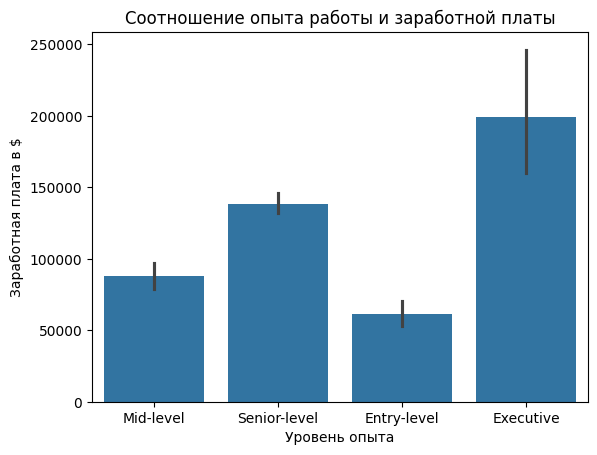

In [46]:
barplot = sns.barplot(data=df,
                      x='experience_level',
                      y='salary_in_usd')
barplot.set_xlabel('Уровень опыта')
barplot.set_ylabel('Заработная плата в $')
barplot.set_title('Соотношение опыта работы и заработной платы');

Анализ статистического теста показывает, что медианные заработные платы у работников с разным уровнем опыта отличаются.

Графический анализ также подтвердает данный факт.

## 🔍6. Проверка статистической гипотезы: Влияет ли местоположение головного офиса (США, Великобритания, Германия, Канада) на заработную плату специалистов Data Analyst?

In [52]:
# Подготовка данных 
data_analyst = df[df['job_title'] == 'Data Analyst']
data_analyst_usa = np.array(df[df['company_location'] == 'United States']['salary_in_usd'])
data_analyst_uk = np.array(df[df['company_location'] == 'United Kingdom']['salary_in_usd'])
data_analyst_germany = np.array(df[df['company_location'] == 'Germany']['salary_in_usd'])
data_analyst_canada = np.array(df[df['company_location'] == 'Canada']['salary_in_usd'])

### Проверка нормальности распределения: Тест Шапиро-Уилка

### 📊 Формулировка гипотез:

### Нулевая гипотеза (H₀): **Выборка распределена нормально**

### Альтернативная гипотеза (H₁):  **Выборка не распределена нормально**

### 🔍 Интерпретация результатов
Тест проверяет соответствие эмпирического распределения теоретическому нормальному распределению

In [55]:
# Словарь с зарплатами Data Analyst по странам
data_analyst_by_country = {
    'United States': data_analyst_usa,
    'United Kingdom': data_analyst_uk,
    'Germany': data_analyst_germany,
    'Canada': data_analyst_canada
}
for keys, values in data_analyst_by_country.items():
    _, p = stats.shapiro(values)
    if p <= alpha:
        print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Выборка для страны {keys} не имеет нормального распределения')
    else:
        print(f'P-value = {p:.3f}. Принимаем нулевую гипотезу. Выборка для страны {keys} имеет нормальное распределения')


P-value = 0.000. Отклоняем нулевую гипотезу. Выборка для страны United States не имеет нормального распределения
P-value = 0.014. Отклоняем нулевую гипотезу. Выборка для страны United Kingdom не имеет нормального распределения
P-value = 0.040. Отклоняем нулевую гипотезу. Выборка для страны Germany не имеет нормального распределения
P-value = 0.000. Отклоняем нулевую гипотезу. Выборка для страны Canada не имеет нормального распределения


### Нулевая гипотеза (H₀)
**Отсутствие статистически значимых различий в медианных зарплатах Data Analyst между странами**  
$H_0: \mu_{US} = \mu_{UK} = \mu_{DE} = \mu_{CA}$

### Альтернативная гипотеза (H₁)
**Наличие статистически значимых различий в медианных зарплатах Data Analyst между странами**  
$H_1: \exists i \neq j \quad \mu_i \neq \mu_j$

где:
- $\mu_{US}$ — медианная заработная плата Data Analyst в **США**
- $\mu_{UK}$ — медианная заработная плата Data Analyst в **Великобритании**
- $\mu_{DE}$ — медианная заработная плата Data Analyst в **Германии**
- $\mu_{CA}$ — медианная заработная плата Data Analyst в **Канаде**

---

### 🎯 Цель исследования
Проверить, существуют ли статистически значимые различия в медианных зарплатах специалистов Data Analyst между компаниями, головные офисы которых расположены в разных странах.

---

### Статистический тест Краскела-Уоллиса



In [56]:
_, p = stats.kruskal(data_analyst_usa, data_analyst_uk, data_analyst_germany, data_analyst_canada)

if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Статистически значимых отличий между выборками нет.')

P-value = 0.000. Отклоняем нулевую гипотезу. Существует статистически значимое отличие между выборками.


In [57]:
data_analyst_for_graphics = data_analyst[data_analyst['company_location'].isin([
    'United States', 
    'United Kingdom', 
    'Germany', 
    'Canada'
])]

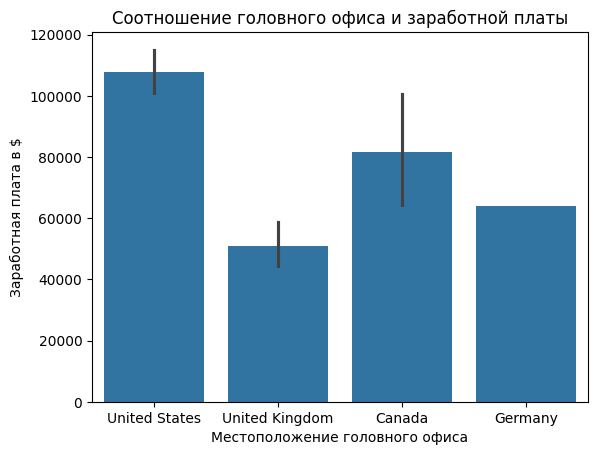

In [59]:
barplot = sns.barplot(data=data_analyst_for_graphics,
                      x='company_location',
                      y='salary_in_usd')
barplot.set_xlabel('Местоположение головного офиса')
barplot.set_ylabel('Заработная плата в $')
barplot.set_title('Соотношение головного офиса и заработной платы');

Статистический анализ показывает, что специалисты data analyst имеют статистически отличающуюся заработную плату в зависимости от местоположения головного офиса. То есть можно утверждать, что местоположение головного офиса компании влияет на размер заработной платы.

Объяснить это можно достаточно просто, развитие it-компаний в странах идёт по-разному, поэтому и заработная плата подстраивается под текущую рыночную ситуацию. Очевидно, что в США рынок it развит лучше всех в мире, высокая концентрация компаний, конкуренция за таланты приводит к росту заработных плат.

## 🔍7. Проверка статистической гипотезы: Есть ли связь между опытом работы и размером компании?

### Нулевая гипотеза (H₀)
**Отсутствие статистически значимой связи между должностью и размером компании**  
$H_0: \text{Опыт работы и размер компании зависимы}$

### Альтернативная гипотеза (H₁)  
**Наличие статистически значимой связи между должностью и размером компании**  
$H_1: \text{Опыт работы и размер компании независимы}$

### 🎯 Цель исследования
Проверить, существует ли статистически значимая связь между распределением опыта работы и размером компании?
---

### Статистический тест хи-квадрат (χ²)

**Суть теста:** Проверка независимости двух категориальных переменных путем сравнения наблюдаемых частот с ожидаемыми частотами при условии независимости.

In [70]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(df['experience_level'], df['company_size'])
table


company_size,Large,Medium,Small
experience_level,,,
Entry-level,29,30,29
Executive,11,12,3
Mid-level,86,98,29
Senior-level,72,186,22


In [72]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(table)


if p <= alpha:
    print(f'P-value = {p:.3f}. Отклоняем нулевую гипотезу. Опыт работы и размер компании зависимы.')
else:
    print(f'P-value = {p:.3f}. Нет оснований отклонить нулевую гипотезу. Опыт работы и размер компании независимы.')

P-value = 0.000. Отклоняем нулевую гипотезу. Опыт работы и размер компании зависимы.
